In [1]:
import pandas as pd

In [2]:
order_data = pd.read_csv("./order_products__train.csv")
product_data = pd.read_csv("./products.csv")

In [79]:
order_data.shape
#order_data.head()

(1384617, 4)

In [80]:
#merge the two data files
named_orders = pd.merge(order_data, product_data, on="product_id")
#named_orders.head()

In [77]:
counts= named_orders['product_name'].value_counts()
counts

Banana                                            18726
Bag of Organic Bananas                            15480
Organic Strawberries                              10894
Organic Baby Spinach                               9784
Large Lemon                                        8135
Organic Avocado                                    7409
Organic Hass Avocado                               7293
Strawberries                                       6494
Limes                                              6033
Organic Raspberries                                5546
Organic Blueberries                                4966
Organic Whole Milk                                 4908
Organic Cucumber                                   4613
Organic Zucchini                                   4589
Organic Yellow Onion                               4290
Organic Garlic                                     4158
Seedless Red Grapes                                4059
Asparagus                                       

In [30]:
#just_counts = counts.values

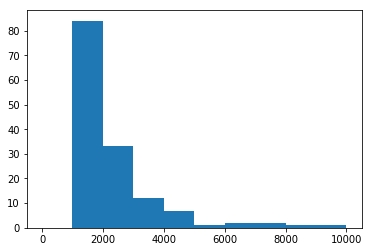

In [41]:

#Visualization example

import matplotlib.pyplot as plt
just_counts = counts.values[counts.values>1000]

plt.hist(just_counts, range=[0,10000])
plt.show()

In [36]:
just_counts


array([18726, 15480, 10894,  9784,  8135,  7409,  7293,  6494,  6033,
        5546,  4966,  4908,  4613,  4589,  4290,  4158,  4059,  3868,
        3823,  3818,  3762,  3597,  3551,  3526,  3505,  3359,  3279,
        3257,  3103,  2932,  2923,  2905,  2891,  2858,  2843,  2809,
        2651,  2646,  2627,  2623,  2568,  2538,  2521,  2497,  2460,
        2424,  2413,  2400,  2393,  2337,  2332,  2323,  2298,  2276,
        2252,  2234,  2225,  2176,  2169,  2088,  2068,  2007,  1993,
        1980,  1966,  1953,  1920,  1920,  1899,  1898,  1893,  1880,
        1864,  1803,  1788,  1767,  1761,  1742,  1694,  1653,  1633,
        1576,  1540,  1535,  1527,  1507,  1493,  1478,  1476,  1468,
        1465,  1449,  1445,  1435,  1423,  1418,  1379,  1362,  1361,
        1351,  1351,  1342,  1335,  1324,  1298,  1284,  1277,  1262,
        1250,  1248,  1222,  1221,  1220,  1218,  1215,  1213,  1207,
        1206,  1186,  1183,  1174,  1166,  1160,  1154,  1152,  1149,
        1147,  1141,

In [42]:
#select the top 1000
counts = counts[counts > 1000]

In [47]:
#only select the most common order items from the named order list
selected_orders = named_orders[named_orders["product_name"].isin(counts.index.values.tolist())]
#selected_orders


#re-arrange the data to make it more usable.  We are going to have one row per order, with each
#item in the order it was added, accross the columns
selected_orders["cols"] = selected_orders.groupby('order_id').cumcount()
selected_pivot = selected_orders.pivot(index='order_id', columns='cols')[["product_name"]]

/home/scott/anaconda3/envs/conda_ML/lib/python3.5/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [48]:
selected_pivot

product_name  \
cols                                                     0    
order_id                                                      
1                                     Organic Celery Hearts   
36                                             Spring Water   
38                                     Organic Baby Arugula   
96                                         Organic Cucumber   
98                                   Bag of Organic Bananas   
112                                    Organic Hass Avocado   
170                                  Bag of Organic Bananas   
226                                     Organic Blueberries   
349                                       Pure Irish Butter   
393                                             Clementines   
456                                             Green Beans   
473                                                  Banana   
631                                    Uncured Genoa Salami   
762                                        Organic Cucumber   
844                                            Baby Spinach   
878                                    Organic Hass Avocado   
915                                                    Soda   
1001                                    Organic Roma Tomato   
1032                                    Organic Raspberries   
1042                                                 Banana   
1077                                 Bag of Organic Bananas   
1086                                                  Limes   
1119                                      Fresh Cauliflower   
1139                                   Organic Strawberries   
1143                                   Organic Hass Avocado   
1145                                                 Banana   
1275                      Organic Garnet Sweet Potato (Yam)   
1280                                    Organic Half & Half   
1318                                     Organic Whole Milk   
1325                                 Bag of Organic Bananas   
...                                                     ...   
3420100      Unsweetened Original Almond Breeze Almond Milk   
3420158                                       Fat Free Milk   
3420160                              Bag of Organic Bananas   
3420232                                Organic Baby Carrots   
3420257                                           Asparagus   
3420258                              Bag of Organic Bananas   
3420286                              Bag of Organic Bananas   
3420293                                    Honeycrisp Apple   
3420313                     Organic Unsweetened Almond Milk   
3420381                                Organic Baby Arugula   
3420463                              Extra Virgin Olive Oil   
3420498                              Bag of Organic Bananas   
3420578                                Organic Yellow Onion   
3420586                                Organic Baby Arugula   
3420603                                        Strawberries   
3420769                     Unsweetened Vanilla Almond Milk   
3420788                              Bag of Organic Bananas   
3420812                                Organic Hass Avocado   
3420851                              Bag of Organic Bananas   
3420857                              Bag of Organic Bananas   
3420894                              Bag of Organic Bananas   
3420895                                    Organic Zucchini   
3420909                                        Spring Water   
3420996                                              Banana   
3420998                               Organic Celery Hearts   
3421026   Organic Sticks Low Moisture Part Skim Mozzarel...   
3421049                               Organic Baby Broccoli   
3421056                               Sparkling Lemon Water   
3421063                                 Organic Half & Half   
3421070                     Organic Unsweetened Almond Milk   

              

In [3]:
#import a class from another python script
from apyori import apriori

In [65]:
purchases = []
for i in range(0, len(selected_pivot)):
    purchases.append([str(selected_pivot.values[i,j]) for j in range(0,25)])

#purchases[0]

['Organic Celery Hearts',
 'Cucumber Kirby',
 'Bag of Organic Bananas',
 'Organic Hass Avocado',
 'Organic Whole String Cheese',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan']

In [70]:
#APRIORI
#Note this should be MAX length below.
rules = apriori(purchases, min_support=0.01, min_confidence=0.1, min_lift=3, min_length=20)

results = list(rules)

In [71]:
results[0]

RelationRecord(items=frozenset({'Limes', 'Large Lemon'}), support=0.016169091185564397, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Large Lemon'}), items_add=frozenset({'Limes'}), confidence=0.1960663798401967, lift=3.205862429858479), OrderedStatistic(items_base=frozenset({'Limes'}), items_add=frozenset({'Large Lemon'}), confidence=0.264379247472236, lift=3.205862429858479)])

In [72]:
rules = 0
for i in range(0, len(results)):
    result = results[i]
    supp = int(result.support*10000)/100
    conf = int(result.ordered_statistics[0].confidence*100)
    hypo = ''.join([x+' ' for x in result.ordered_statistics[0].items_base])
    conc = ''.join([x+' ' for x in result.ordered_statistics[0].items_add])
    #Removing nan from both sides of the equation
    if "nan" not in hypo and "nan" not in conc:
        rules = rules + 1
        print("If "+str(hypo)+ " are purchased, " + str(conf) + "% of the time " + str(conc) + "are purchased [support = "+str(supp)+"%]")

print("Total rules built, omitting NaN: " + str(rules))

If Large Lemon  are purchased, 19% of the time Limes are purchased [support = 1.61%]
If Limes  are purchased, 16% of the time Organic Cilantro are purchased [support = 1.02%]
Total rules built, omitting NaN: 2


In [73]:
#eclat functions
import pyfim

In [74]:
rules = pyfim.eclat(purchases, supp=2, zmin=2, out=[])

In [75]:
rule_count = 0
for i in range(0, len(rules)):
    supp = round(int(rules[i][1]) / len(purchases)*100,3)
    items = rules[i][0]
    if "nan" not in items:
        rule_count = rule_count + 1
        item_1 = rules[i][0][0]
        item_2 = rules[i][0][1]
        print("If " + str(item_1) + " are purchased, " + str(supp) + "% of the time " + str(item_2) + " is purchased [absolute support = " + str(int(rules[i][1])) + "]")
print("Total rules built, omitting NaN: " + str(rule_count))

If Organic Hass Avocado are purchased, 2.453% of the time Bag of Organic Bananas is purchased [absolute support = 2420]
If Organic Avocado are purchased, 2.246% of the time Banana is purchased [absolute support = 2216]
If Large Lemon are purchased, 2.188% of the time Banana is purchased [absolute support = 2158]
If Organic Baby Spinach are purchased, 2.027% of the time Banana is purchased [absolute support = 2000]
If Organic Baby Spinach are purchased, 2.267% of the time Bag of Organic Bananas is purchased [absolute support = 2236]
If Organic Strawberries are purchased, 2.204% of the time Banana is purchased [absolute support = 2174]
If Organic Strawberries are purchased, 3.116% of the time Bag of Organic Bananas is purchased [absolute support = 3074]
Total rules built, omitting NaN: 7


In [90]:
#lab questions
order_data = pd.read_csv("./order_products__train.csv")
product_data = pd.read_csv("./products.csv")
named_orders = pd.merge(order_data, product_data, on="product_id")
counts= named_orders['product_name'].value_counts()

#toggle this one
#counts = counts[counts > 1000]

selected_orders = named_orders[named_orders["product_name"].isin(counts.index.values.tolist())]
#selected_orders


#re-arrange the data to make it more usable.  We are going to have one row per order, with each
#item in the order it was added, accross the columns
selected_orders["cols"] = selected_orders.groupby('order_id').cumcount()
selected_pivot = selected_orders.pivot(index='order_id', columns='cols')[["product_name"]]


purchases = []
for i in range(0, len(selected_pivot)):
    purchases.append([str(selected_pivot.values[i,j]) for j in range(0,25)])

rules = pyfim.eclat(purchases, supp=1, zmin=2, out=[])

rule_count = 0
for i in range(0, len(rules)):
    supp = round(int(rules[i][1]) / len(purchases)*100,3)
    items = rules[i][0]
    if "nan" not in items:
        rule_count = rule_count + 1
        item_1 = rules[i][0][0]
        item_2 = rules[i][0][1]
        print("If " + str(item_1) + " are purchased, " + str(supp) + "% of the time " + str(item_2) + " is purchased [absolute support = " + str(int(rules[i][1])) + "]")
print("Total rules built, omitting NaN: " + str(rule_count))

If Organic Raspberries are purchased, 1.273% of the time Organic Strawberries is purchased [absolute support = 1670]
If Organic Raspberries are purchased, 1.357% of the time Bag of Organic Bananas is purchased [absolute support = 1780]
If Limes are purchased, 1.014% of the time Banana is purchased [absolute support = 1331]
If Limes are purchased, 1.216% of the time Large Lemon is purchased [absolute support = 1595]
If Strawberries are purchased, 1.485% of the time Banana is purchased [absolute support = 1948]
If Organic Hass Avocado are purchased, 1.173% of the time Organic Strawberries is purchased [absolute support = 1539]
If Organic Hass Avocado are purchased, 1.844% of the time Bag of Organic Bananas is purchased [absolute support = 2420]
If Organic Avocado are purchased, 1.028% of the time Large Lemon is purchased [absolute support = 1349]
If Organic Avocado are purchased, 1.069% of the time Organic Baby Spinach is purchased [absolute support = 1402]
If Organic Avocado are purchas

In [5]:
#lab questions
order_data = pd.read_csv("./order_products__train.csv")
product_data = pd.read_csv("./products.csv")
named_orders = pd.merge(order_data, product_data, on="product_id")
counts= named_orders['product_name'].value_counts()

#toggle this one
#counts = counts[counts > 1000]

selected_orders = named_orders[named_orders["product_name"].isin(counts.index.values.tolist())]
#selected_orders


#re-arrange the data to make it more usable.  We are going to have one row per order, with each
#item in the order it was added, accross the columns
selected_orders["cols"] = selected_orders.groupby('order_id').cumcount()
selected_pivot = selected_orders.pivot(index='order_id', columns='cols')[["product_name"]]

purchases = []
for i in range(0, len(selected_pivot)):
    purchases.append([str(selected_pivot.values[i,j]) for j in range(0,25)])

rules = apriori(purchases, min_support=0.01, min_confidence=0.1, min_lift=3, min_length=20)

results = list(rules)

rules = 0
for i in range(0, len(results)):
    result = results[i]
    supp = int(result.support*10000)/100
    conf = int(result.ordered_statistics[0].confidence*100)
    hypo = ''.join([x+' ' for x in result.ordered_statistics[0].items_base])
    conc = ''.join([x+' ' for x in result.ordered_statistics[0].items_add])
    #Removing nan from both sides of the equation
    if "nan" not in hypo and "nan" not in conc:
        rules = rules + 1
        print("If "+str(hypo)+ " are purchased, " + str(conf) + "% of the time " + str(conc) + "are purchased [support = "+str(supp)+"%]")

print("Total rules built, omitting NaN: " + str(rules))

If Large Lemon  are purchased, 19% of the time Limes are purchased [support = 1.21%]
If Organic Raspberries  are purchased, 30% of the time Organic Strawberries are purchased [support = 1.27%]
Total rules built, omitting NaN: 2
